# Solving the Cart Pole problem with vanilla policy gradient algorithm

In [1]:
import os
import math
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = [12, 8]
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import gymnasium as gym
import CartPole as cp
import pickle

## Agent loading

Environment definition:

In [2]:
env = gym.make('CartPole-v1')

Loading the trained agent (see the script `training.py` to inspect the code for training):

In [3]:
with open('cache/agent.pickle', 'rb') as file:
    agent = pickle.load(file)

Consider the learning of the agent is incremental, so you can call again `agent.train()` to perform a new training session starting from the last session.

## Training evaluation

### Learning curve

The class `Agent` stores the total rewards by episode earned during the training session. By calling the method `train_history()`, you can get the training rewards. Furthermore, you can pass a value (`bin_window`) to reduce the vector in bins and return the mean of rewards within bins. This feature can be used to quickly smooth the learning curve.

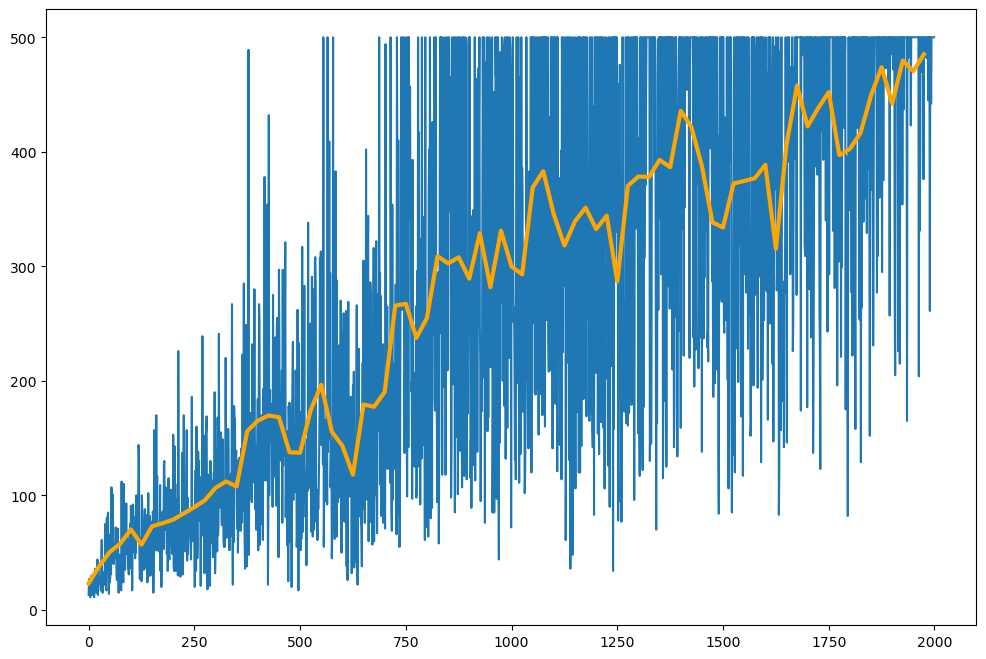

In [4]:
n_episodes = len(agent.train_history())

plt.plot(agent.train_history())

bin_size = 25
bin_avg = agent.train_history(bin_size)
plt.plot(np.array([*range(len(bin_avg))])*bin_size, bin_avg, color='orange', linewidth=3)

plt.show()

## Evaluate performances

To evaluate the performances of the agent, the game is run 1000 times.

In [5]:
with open('cache/performances.pickle', 'rb') as file:
    performances = pickle.load(file)

solved = [episode['solved'] for episode in performances]
reward = [episode['reward'] for episode in performances]

print('Proportion of solved:', np.mean(solved))

Proportion of solved: 0.658


Distribution of rewards:

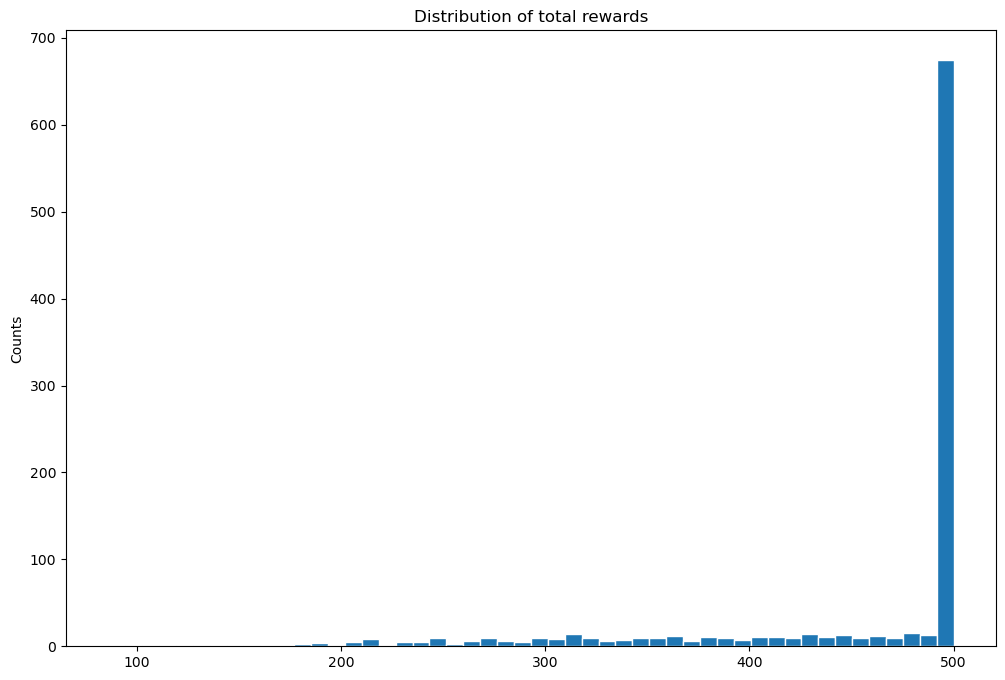

In [6]:
solved = np.array([episode['solved'] for episode in performances])
rewards = np.array([episode['reward'] for episode in performances])
plt.hist(rewards, bins=50, density=False, edgecolor='white')
plt.title('Distribution of total rewards')
plt.ylabel('Counts')
plt.show()

In [7]:
print('Percentage of solved: %.2f' % (np.sum(solved) / solved.shape[0] * 100) )

Percentage of solved: 65.80


In [8]:
print('Mean of total rewards: %.2f' % np.mean(reward) )

Mean of total rewards: 453.11


In [9]:
print('Median of total rewards: %.2f' % np.median(reward) )

Median of total rewards: 500.00


In [10]:
print('The 95%% of total rewards is between %.2f and %.2f' % ( np.quantile(reward, 0.025), np.quantile(reward, 0.975) ) )

The 95% of total rewards is between 212.00 and 500.00
